# **Segmentação de clientes**

Objetivos:
1. Explorar e analisar a base de dados.
2. Criar uma segmentação de clientes.
3. Criar um modelo preditivo.


# **Estrutura do notebook**



1.   Bibliotecas
2.   Importando os dados
3.   Explorando os dados
4.   Limpando os dados
5.   Extraindo valores nulos
6.   Explorando os dados
7.   Segmentação dos dados
8.   Criando o arquivo de treinamento e teste
9.   Treinando o modelo
10.  Modelo KMeans  
11.  Modelo K Neighbors
12.  Modelo RandomForestClassifier 
13.  Modelo ExtraTreeClassifier
14.  Modelo AdaBoostClassifier
15.  Conclusão
























**1. Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler #Transformar os dados em uma mesma escala
from sklearn.cluster import KMeans #Criar a segmentação de mercado ou agrupamento de clientes
from sklearn.decomposition import PCA #Redução de dimensionalidade dos dados
from termcolor import colored as cl # Customização do texto
import seaborn as sb # Visualização dos dados
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



**2. Importando os dados**

In [ ]:
#Ler  o arquivo
dataset = pd.read_csv('/content/ml_project1_data.csv', dtype= {'Education':'category'})

**3.Explorando os dados**

In [ ]:
#Quantidade de registros
dataset.shape


(2240, 29)

In [ ]:
#Tipo de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   object  
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   int64   
 6   Teenhome             2240 non-null   int64   
 7   Dt_Customer          2240 non-null   object  
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [ ]:
#Cabeçalho da base de dados
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Entendendo os campos do dataset
dataset.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2240,NaN,NaN,NaN,5592.16,3246.66,0,2828.25,5458.5,8427.75,11191
Year_Birth,2240,NaN,NaN,NaN,1968.81,11.9841,1893,1959,1970,1977,1996
Education,2240,5,Graduation,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,2240,8,Married,864,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,2216,NaN,NaN,NaN,52247.3,25173.1,1730,35303,51381.5,68522,666666
Kidhome,2240,NaN,NaN,NaN,0.444196,0.538398,0,0,0,1,2
Teenhome,2240,NaN,NaN,NaN,0.50625,0.544538,0,0,0,1,2
Dt_Customer,2240,663,2012-08-31,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,2240,NaN,NaN,NaN,49.1094,28.9625,0,24,49,74,99
MntWines,2240,NaN,NaN,NaN,303.936,336.597,0,23.75,173.5,504.25,1493


**4.Limpando os dados**

In [ ]:
# Excluindo colunas que não são importantes para a análise dos dados
dataset.drop(columns=['ID'], inplace=True)
dataset.drop(columns=['Dt_Customer'], inplace=True)

In [ ]:
# Verificando os valores nulos
total_null_values = dataset.isnull().sum().sort_values(ascending=False) 
not_null_values = dataset.notnull().sum().sort_values(ascending=False) 
null_values_percentage = (dataset.isnull().sum()/dataset.notnull().count().sort_values(ascending=False)) * 100

# Calculando o percentual de valores nulos
dataset_missing_values = pd.concat({'Null': total_null_values, 'Not Null': not_null_values, 'Percentage': null_values_percentage}, axis=1)

# Visualizar os dados formatados
dataset_missing_values


,Null,Not Null,Percentage
Income,24,2216,1.071429
Response,0,2240,0.000000
MntGoldProds,0,2240,0.000000
Education,0,2240,0.000000
Marital_Status,0,2240,0.000000
Kidhome,0,2240,0.000000
Teenhome,0,2240,0.000000
Recency,0,2240,0.000000
MntWines,0,2240,0.000000
MntFruits,0,2240,0.000000


**5.	Extraindo valores nulos**

Text(0.5, 1.0, 'Missing Data in our Dataset')

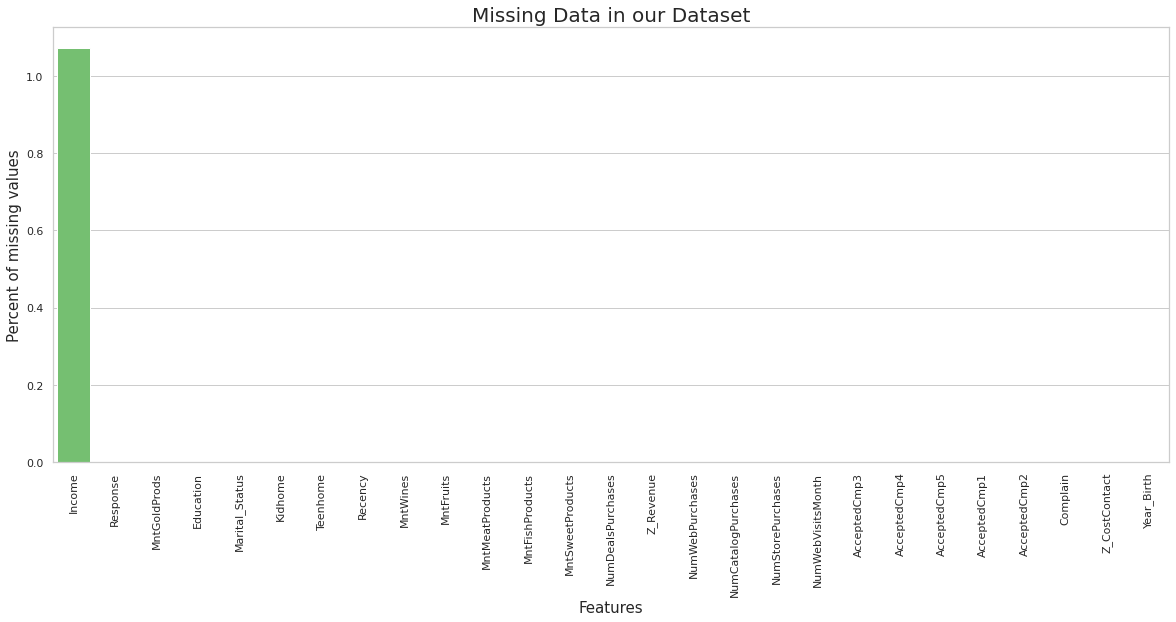

In [ ]:
#Verificando as colunas com valores nulos
sns.set(style="whitegrid")

# Inicializando o matplotlib 
fig, axs = plt.subplots(figsize=(20,8))

# plot the Total Missing Values
sns.set_color_codes("muted")
sns.barplot(x=dataset_missing_values.index, y="Percentage", data=dataset_missing_values, color="g")

# customizing Bar Graph
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Missing Data in our Dataset', fontsize=20)

In [ ]:
#Preencher com 0 os campos nulos do atributo Income
dataset['Income'].fillna('0', inplace=True)

In [ ]:
#Converter float para inteiro
dataset['Income'] = dataset['Income'].astype(int)

In [ ]:
#Verificar se ainda existe campos nulos
dataset.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
# Visualizando Dataset
dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,1946,PhD,Together,64014,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,1981,Graduation,Divorced,56981,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,1956,Master,Together,69245,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


**6. Explorando os dados**

.......................................
Número de clientes que aceitaram a oferta da última campanha: 334
.......................................
Número de clientes que não aceitaram aoferta da última campanha :1906
.......................................


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


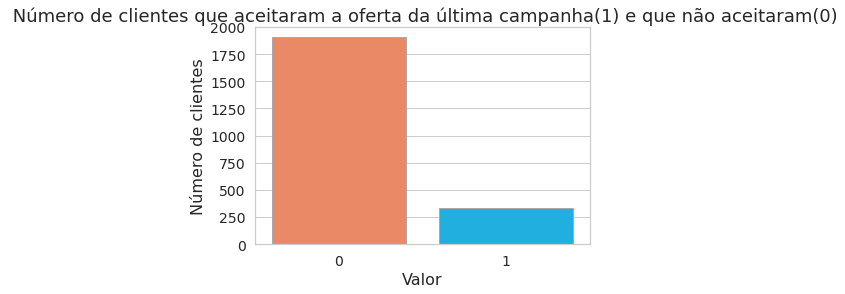

In [ ]:
# Target - Número de clientes que aceitara a oferta da última campanha

default = dataset[dataset['Response'] == 1]
non_default = dataset[dataset['Response'] == 0]

print(cl('.......................................', attrs = ['bold']))
print(cl('Número de clientes que aceitaram a oferta da última campanha: {}'.format(len(default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
print(cl('Número de clientes que não aceitaram aoferta da última campanha :{}'.format(len(non_default)), attrs = ['bold']))
print(cl('.......................................', attrs = ['bold']))
sb.countplot(dataset['Response'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title(' Número de clientes que aceitaram a oferta da última campanha(1) e que não aceitaram(0)', 
          fontsize = 18)
plt.xlabel('Valor', 
           fontsize = 16)
plt.ylabel('Número de clientes', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

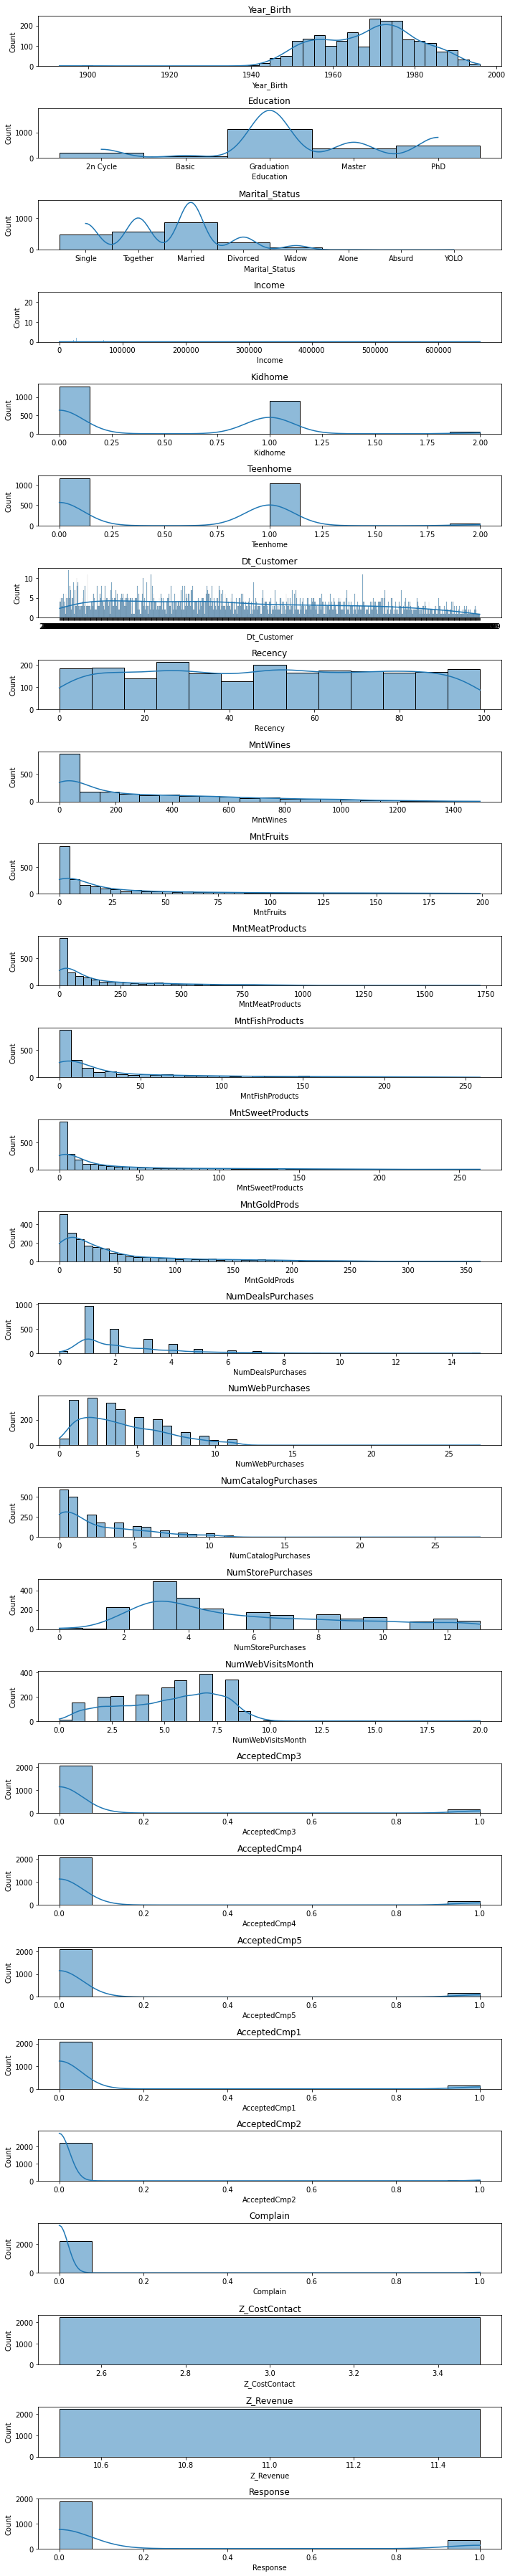

In [ ]:
#Visualização da distribuição dos dados através do histograma
plt.figure(figsize=(10,50))
for i in range(len(dataset.columns)):
    plt.subplot(28,1,i+1)
    sns.histplot(dataset[dataset.columns[i]], kde= True)
    plt.title(dataset.columns[i])
plt.tight_layout();

In [ ]:
# Definindo um estilo para os gráficos:
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

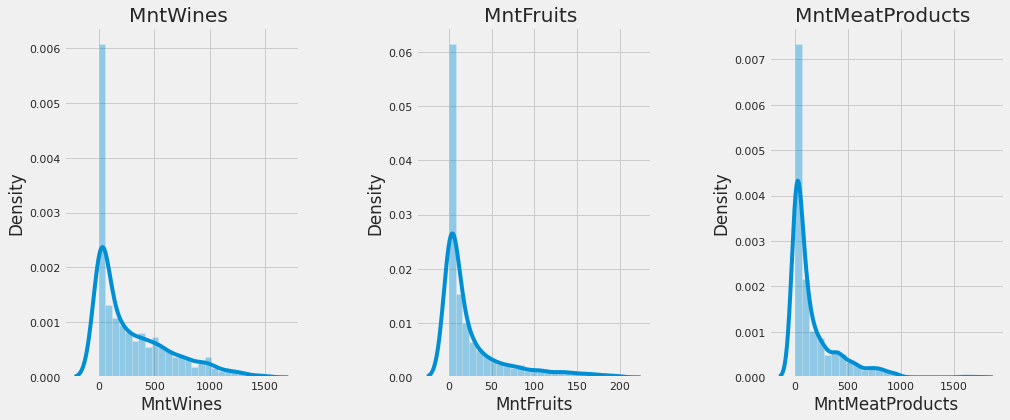

In [ ]:
# Verificando as distribuição dos dados - Valor gasto com produtos nos últimos 2 anos
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['MntWines' , 'MntFruits' , 'MntMeatProducts']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

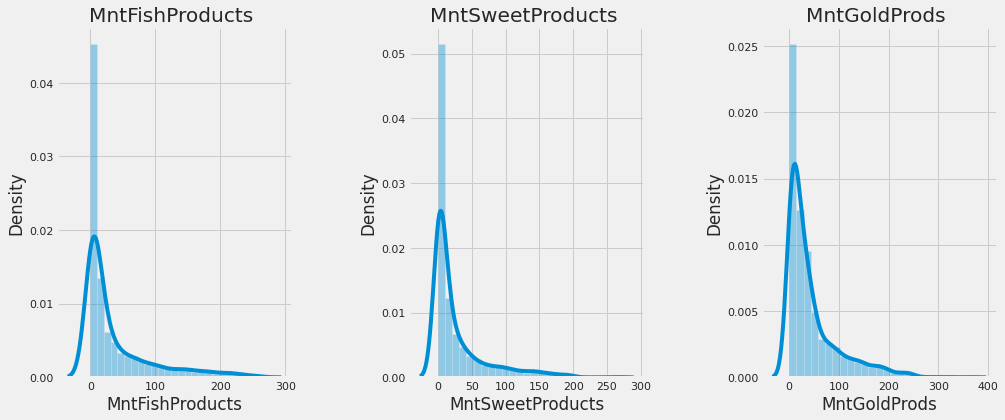

In [ ]:
# Verificando as distribuição dos dados - Valor gasto com produtos nos últimos 2 anos
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['MntFishProducts' , 'MntSweetProducts' , 'MntGoldProds']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

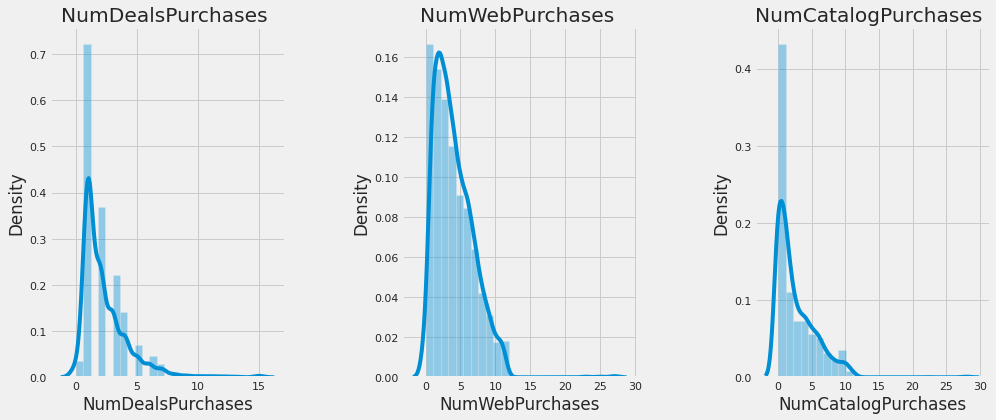

In [ ]:
# Verificando as distribuição dos dados - Número de compras realizadas
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['NumDealsPurchases' , 'NumWebPurchases' , 'NumCatalogPurchases']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


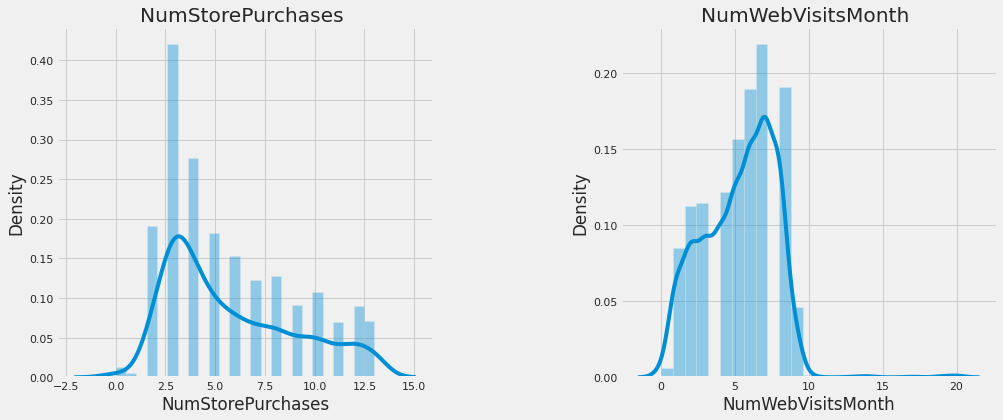

In [ ]:
# Verificando as distribuição dos dados - Número de compras
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['NumStorePurchases' , 'NumWebVisitsMonth'] :
    n += 1
    plt.subplot(1 , 2 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(dataset[x] , bins = 25)
    plt.title('{} '.format(x))
plt.show()


In [ ]:
#Convertendo as colunas categóricas em numéricas atribuindo números inteiros a classes distintas
le = preprocessing.LabelEncoder()
dataset['Education'] = le.fit_transform(dataset['Education']) 
dataset['Marital_Status'] = le.fit_transform(dataset['Marital_Status']) 
dataset.head(10)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,2,4,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,2,4,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,2,5,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,2,5,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,4,3,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,1967,3,5,62513,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,1971,2,2,55635,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,1985,4,3,33454,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,1974,4,5,30351,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,1950,4,5,5648,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [ ]:
#Excluindo colunas que não serão analisadas através da matriz de correlação
columns = [ 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome','Teenhome', 'Recency', 'Teenhome', 'Recency',  'Complain', 'Z_CostContact', 'Z_Revenue']
dataset.drop(columns, inplace=True, axis=1)

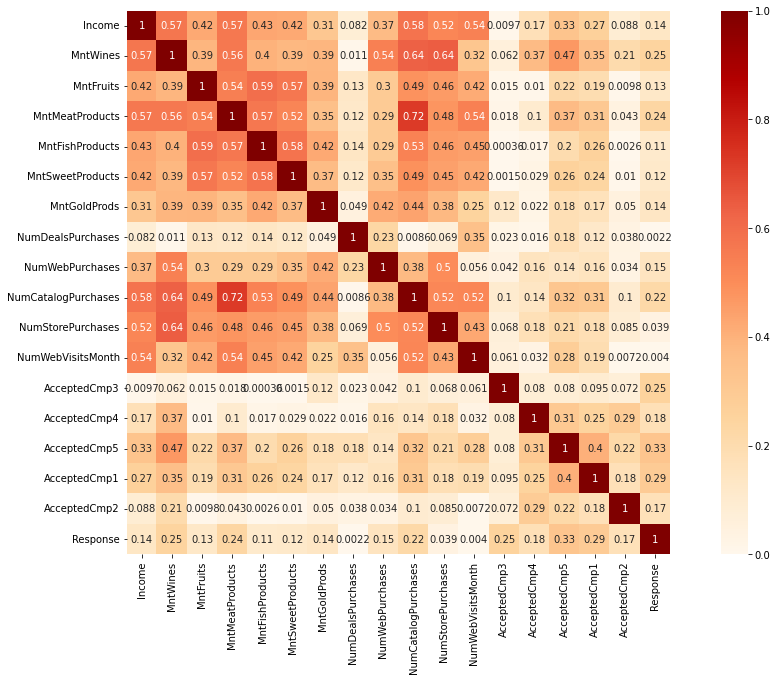

In [ ]:
# Visualizar a matriz de correlação usando heatmap
corr_matrix = abs(dataset.corr())

#Correlação com a target
corr_target = corr_matrix['Response']

#Selecionando as features com maior correlação
relevant_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response']

# Plotando a matriz
fig, axs = plt.subplots(figsize=(18, 10))
sns.heatmap(abs(dataset[relevant_features].corr()), yticklabels=relevant_features, xticklabels=relevant_features, vmin = 0.0, square=True, annot=True, vmax=1.0, cmap='OrRd')

**7.Segmentação de dados**

In [ ]:
#Colocando os dados na mesma escala
scaler =StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)


In [ ]:
# Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters):
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(dataset)
  wcss_1.append(kmeans.inertia_)

In [ ]:
print(wcss_1)

[1468812422695.0117, 702772091370.5464, 347259536600.08374, 201582328085.95032, 134540013667.76747, 92392932163.55557, 62619117504.04077, 45944491120.37285, 34587457981.63782, 26640956996.412766, 20886168284.32264, 16685094884.753086, 13871850293.528755, 11864046027.643852, 10146699061.945791, 8864323128.201633, 8009135530.047205, 7136194501.774359, 6241955415.278336]


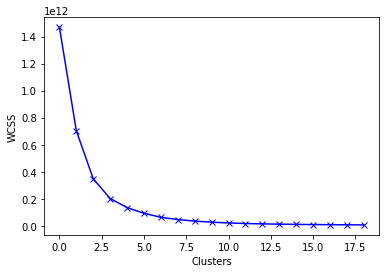

In [ ]:
#Gerar gráfico com os clusters
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

In [ ]:
#Através do gráfico acima foi possível observar que através do método Elbow foram escolidos 12 clusters
kmeans = KMeans(n_clusters=12)
kmeans.fit(dataset_scaled)
labels = kmeans.labels_

In [ ]:
labels, len(labels)

(array([6, 5, 9, ..., 7, 9, 5], dtype=int32), 2240)

In [ ]:
#Verificar a quantidade de clientes por cluster
np.unique(labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32),
 array([494, 194,  81, 148, 114, 442, 177,  91,  21, 333, 115,  30]))

In [ ]:
#Gerar os centróides
kmeans.cluster_centers_

array([[ 7.96939599e-01, -3.03338778e-01, -5.56395696e-02,
        -8.87008888e-01,  7.84353821e-01, -8.96429894e-01,
         4.33218915e-03, -8.19674026e-01, -5.02517737e-01,
        -6.32115598e-01, -5.21134554e-01, -5.01426751e-01,
        -5.39795338e-01, -2.82454724e-01, -6.97986663e-01,
        -7.62667158e-01, -8.16726532e-01,  6.48012852e-01,
        -2.80140277e-01, -2.83830188e-01, -2.80140277e-01,
        -2.62111217e-01, -1.16510346e-01, -9.72816653e-02,
         0.00000000e+00,  0.00000000e+00, -1.96970651e-01],
       [ 3.04054367e-02,  2.54913860e-01,  9.29207870e-02,
         1.02505333e+00, -7.77336814e-01, -8.73085253e-01,
         3.16479693e-02,  6.37179592e-01,  7.47358711e-01,
         1.72460970e+00,  9.26234609e-01,  6.03473502e-01,
         2.91232561e-01, -5.33793501e-01, -8.44896505e-04,
         1.29386229e+00,  7.05271307e-01, -1.27777866e+00,
        -2.00763360e-01, -2.24958070e-01, -2.80140277e-01,
        -2.62111217e-01, -1.16510346e-01, -9.72816653e-

In [ ]:
#Centróides com dados normalizados
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataset.columns])
cluster_centers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.796940,-0.303339,-0.055640,-0.887009,0.784354,-0.896430,0.004332,-0.819674,-0.502518,-0.632116,-0.521135,-0.501427,-0.539795,-0.282455,-0.697987,-0.762667,-0.816727,0.648013,-0.280140,-0.283830,-0.280140,-0.262111,-0.116510,-0.097282,0.0,0.0,-0.196971
1,0.030405,0.254914,0.092921,1.025053,-0.777337,-0.873085,0.031648,0.637180,0.747359,1.724610,0.926235,0.603474,0.291233,-0.533794,-0.000845,1.293862,0.705271,-1.277779,-0.200763,-0.224958,-0.280140,-0.262111,-0.116510,-0.097282,0.0,0.0,0.203660
2,-0.165143,0.110950,0.078904,1.124791,-0.756411,-0.748479,0.028200,1.589248,0.761122,1.455673,0.687719,0.877931,0.584249,-0.673105,0.480521,1.040788,0.816639,-1.158378,-0.042500,0.515183,3.569640,-0.262111,-0.116510,-0.097282,0.0,0.0,0.690507
3,-0.061615,0.082466,-0.050403,-0.141962,0.844271,0.745591,-0.113216,-0.091667,-0.344720,-0.278205,-0.300097,-0.266908,0.145324,2.311588,0.652904,-0.272781,0.008427,0.858220,-0.280140,-0.258107,-0.280140,-0.179464,-0.116510,-0.097282,0.0,0.0,0.188406
4,0.000101,-0.116129,-0.050623,1.126152,-0.743736,-0.752657,-0.015289,1.341178,0.985746,1.445268,1.296931,1.140469,0.811756,-0.654101,0.550454,1.274244,0.706885,-0.962062,0.395260,0.684633,1.644750,3.815174,-0.116510,-0.097282,0.0,0.0,1.132878
5,-0.489667,0.088447,0.084901,-0.407657,0.351654,0.794730,0.048494,-0.739556,-0.560914,-0.641462,-0.575845,-0.552071,-0.601299,-0.141300,-0.741492,-0.708843,-0.708100,0.130648,-0.280140,-0.283830,-0.280140,-0.262111,-0.116510,-0.097282,0.0,0.0,-0.342392
6,-0.005954,-0.525981,0.061986,0.652043,-0.657283,-0.089312,0.053586,0.304886,1.743668,0.572967,1.574607,1.742345,1.122141,-0.200407,0.756497,0.734267,0.841554,-0.689356,-0.171389,-0.197795,-0.280140,-0.262111,-0.116510,-0.097282,0.0,0.0,-0.259999
7,-0.335986,0.285036,-0.045158,0.269331,-0.457745,0.684900,0.094136,0.876837,-0.322642,-0.289277,-0.400355,-0.407842,-0.200581,0.508691,0.614230,0.066755,0.561562,0.313427,-0.280140,3.523233,0.015997,0.096331,-0.116510,-0.097282,0.0,0.0,0.044156
8,-0.309694,-0.519522,-0.058775,-0.251729,0.413300,0.032254,0.136008,-0.400971,-0.053106,-0.241392,-0.215383,-0.231133,-0.317236,0.004314,-0.167659,-0.210247,-0.169860,0.203209,0.086505,-0.283830,-0.096817,-0.262111,-0.116510,10.279429,0.0,0.0,-0.017547
9,-0.421909,0.360189,-0.061566,0.345931,-0.708061,0.780066,-0.021304,0.570340,-0.013265,-0.044238,-0.065813,-0.024736,0.314242,0.237490,0.855853,0.299572,0.857292,-0.100757,-0.222336,-0.283830,-0.280140,-0.200891,-0.116510,-0.097282,0.0,0.0,-0.292150


In [ ]:
#Centróides retornando com dados originais(sem normalizar) do dataset
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [dataset.columns])
cluster_centers

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1978.354251,2.052632,3.670040,28976.815789,0.866397,0.018219,49.234818,28.097166,6.319838,24.303644,9.062753,6.368421,15.868421,1.779352,2.145749,0.433198,3.135628,6.888664,1.110223e-16,-4.024558e-16,4.163336e-17,-4.163336e-17,-4.683753e-17,5.204170e-17,3.0,11.0,0.078947
1,1969.170103,2.680412,3.829897,77932.541237,0.025773,0.030928,50.025773,518.360825,56.020619,556.134021,88.113402,51.969072,59.211340,1.293814,4.082474,6.443299,8.082474,2.216495,2.061856e-02,1.546392e-02,-9.714451e-17,1.110223e-16,-1.734723e-17,1.387779e-17,3.0,11.0,0.221649
2,1966.827160,2.518519,3.814815,80486.197531,0.037037,0.098765,49.925926,838.753086,56.567901,495.444444,75.086420,63.296296,74.493827,1.024691,5.419753,5.703704,8.444444,2.506173,6.172840e-02,2.098765e-01,1.000000e+00,-2.775558e-17,-3.469447e-18,-3.469447e-18,3.0,11.0,0.395062
3,1968.067568,2.486486,3.675676,48052.722973,0.898649,0.912162,45.831081,273.087838,12.594595,104.168919,21.135135,16.047297,51.601351,6.790541,5.898649,1.864865,5.817568,7.398649,-1.249001e-16,6.756757e-03,-5.551115e-17,2.027027e-02,1.734723e-18,-3.469447e-18,3.0,11.0,0.216216
4,1968.807018,2.263158,3.675439,80521.026316,0.043860,0.096491,48.666667,755.271930,65.500000,493.096491,108.359649,74.131579,86.359649,1.061404,5.614035,6.385965,8.087719,2.982456,1.754386e-01,2.543860e-01,5.000000e-01,1.000000e+00,3.469447e-18,-1.734723e-18,3.0,11.0,0.552632
5,1962.938914,2.493213,3.821267,41249.957014,0.633484,0.938914,50.513575,55.058824,3.997738,22.194570,6.074661,4.278281,12.660633,2.052036,2.024887,0.590498,3.488688,5.633484,1.804112e-16,-3.608225e-16,1.249001e-16,-1.249001e-16,-5.204170e-17,4.857226e-17,3.0,11.0,0.027149
6,1968.734463,1.802260,3.796610,68382.124294,0.090395,0.457627,50.661017,406.536723,95.638418,296.248588,123.525424,98.971751,102.548023,1.937853,6.186441,4.807910,8.525424,3.644068,2.824859e-02,2.259887e-02,-9.714451e-17,8.326673e-17,-1.040834e-17,1.734723e-18,3.0,11.0,0.056497
7,1964.780220,2.714286,3.681319,58583.307692,0.197802,0.879121,51.835165,599.010989,13.472527,101.670330,15.659341,10.230769,33.560440,3.307692,5.791209,2.857143,7.615385,6.076923,-8.326673e-17,1.000000e+00,7.692308e-02,8.791209e-02,-5.204170e-18,-3.469447e-18,3.0,11.0,0.164835
8,1965.095238,1.809524,3.666667,45242.285714,0.666667,0.523810,53.047619,169.000000,24.190476,112.476190,25.761905,17.523810,27.476190,2.333333,3.619048,2.047619,5.238095,5.809524,9.523810e-02,0.000000e+00,4.761905e-02,1.387779e-17,1.734723e-18,1.000000e+00,3.0,11.0,0.142857
9,1963.750751,2.798799,3.663664,60544.534535,0.063063,0.930931,48.492492,495.867868,25.774775,156.966967,33.930931,26.042042,60.411411,2.783784,6.462462,3.537538,8.576577,5.072072,1.501502e-02,-2.220446e-16,6.938894e-17,1.501502e-02,-4.163336e-17,3.989864e-17,3.0,11.0,0.045045


In [ ]:
cluster_centers.max()

Year_Birth              1978.354251
Education                  2.798799
Marital_Status             3.900000
Income                 80521.026316
Kidhome                    0.898649
Teenhome                   0.938914
Recency                   53.047619
MntWines                 898.666667
MntFruits                 95.638418
MntMeatProducts          556.134021
MntFishProducts          123.525424
MntSweetProducts          98.971751
MntGoldProds             102.548023
NumDealsPurchases          6.790541
NumWebPurchases            6.462462
NumCatalogPurchases        6.443299
NumStorePurchases          8.576577
NumWebVisitsMonth          7.398649
AcceptedCmp3               1.000000
AcceptedCmp4               1.000000
AcceptedCmp5               1.000000
AcceptedCmp1               1.000000
AcceptedCmp2               1.000000
Complain                   1.000000
Z_CostContact              3.000000
Z_Revenue                 11.000000
Response                   0.666667
dtype: float64

In [ ]:
cluster_centers.min()

Year_Birth             1.961783e+03
Education              1.809524e+00
Marital_Status         3.607273e+00
Income                 2.878394e+04
Kidhome                1.102941e-02
Teenhome               4.158004e-03
Recency                4.257018e+01
MntWines               2.778170e+01
MntFruits              2.783394e+00
MntMeatProducts        1.823827e+01
MntFishProducts        3.873646e+00
MntSweetProducts       2.808664e+00
MntGoldProds           1.115884e+01
NumDealsPurchases      9.424460e-01
NumWebPurchases        1.895307e+00
NumCatalogPurchases    4.241164e-01
NumStorePurchases      3.114345e+00
NumWebVisitsMonth      2.328704e+00
AcceptedCmp3          -1.249001e-16
AcceptedCmp4          -4.024558e-16
AcceptedCmp5          -1.110223e-16
AcceptedCmp1          -6.938894e-17
AcceptedCmp2          -5.377643e-17
Complain              -3.469447e-18
Z_CostContact          3.000000e+00
Z_Revenue              1.100000e+01
Response               1.102941e-02
dtype: float64

In [ ]:
#Adicionando os clusters no dataset
dataset_df_cluster = pd.concat([dataset, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_df_cluster.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,1957,2,4,58138,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,6
1,1954,2,4,46344,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,5
2,1965,2,5,71613,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,9
3,1984,2,5,26646,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,0
4,1981,4,3,58293,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,3


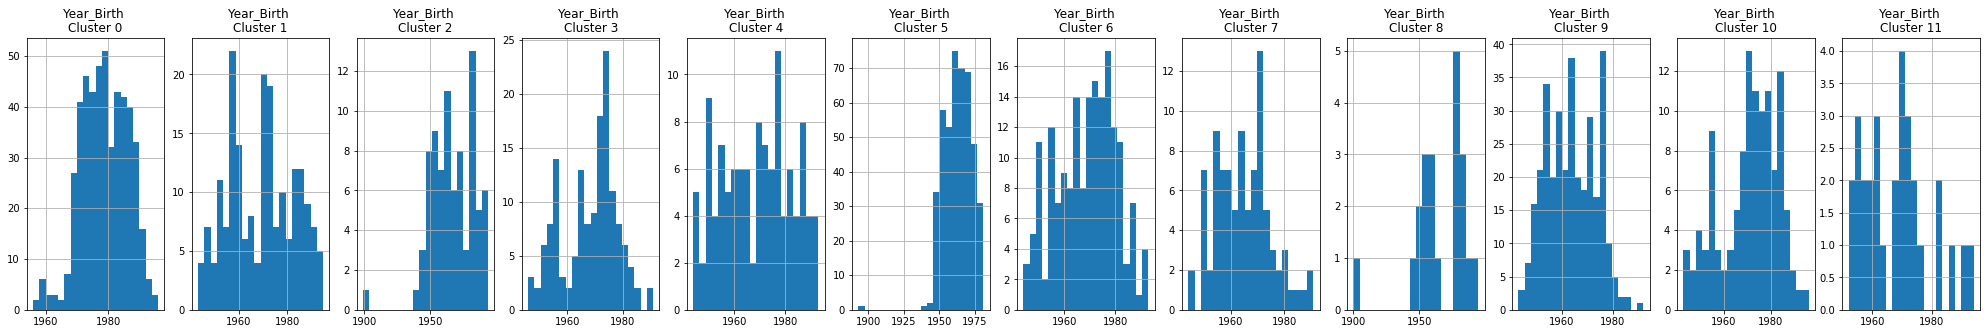

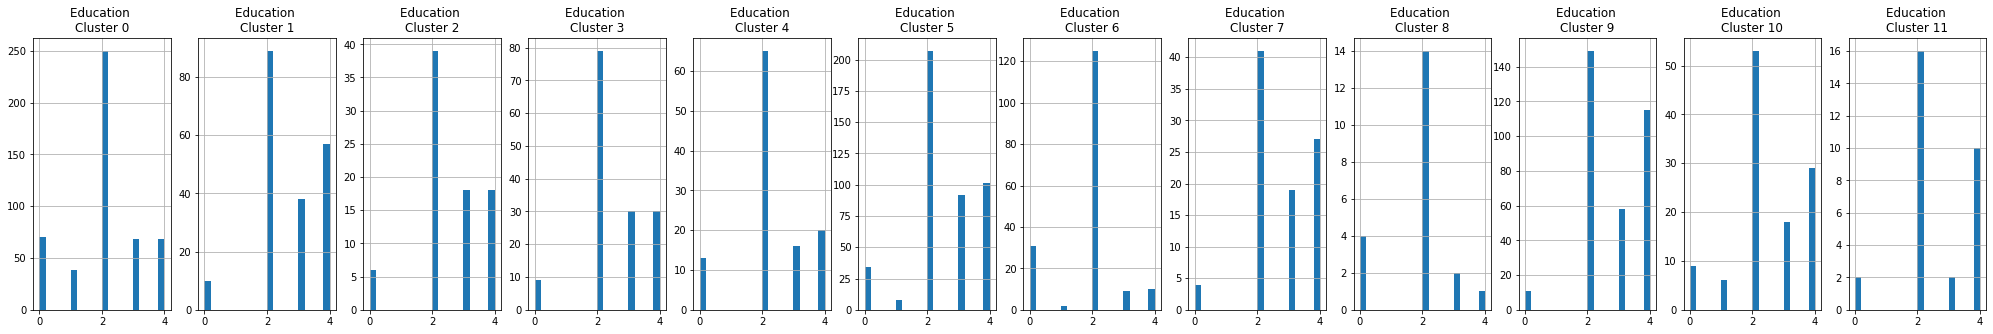

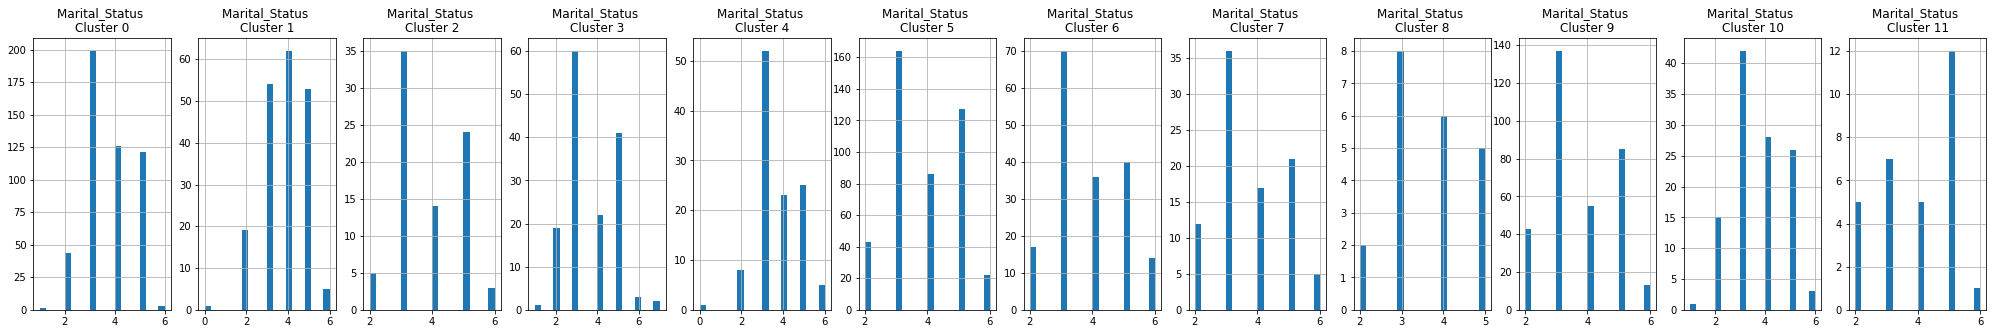

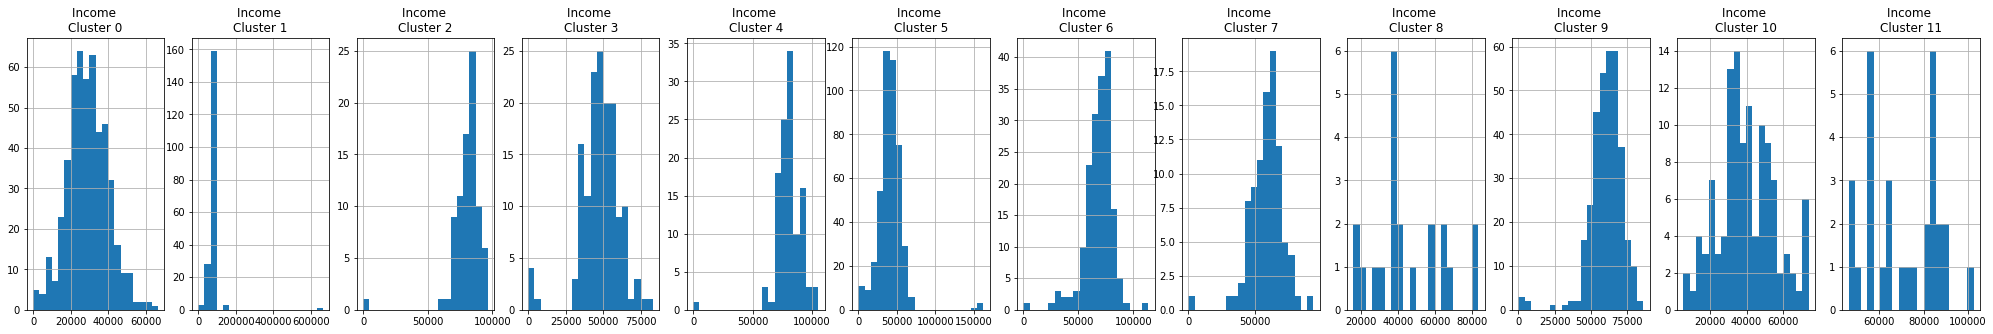

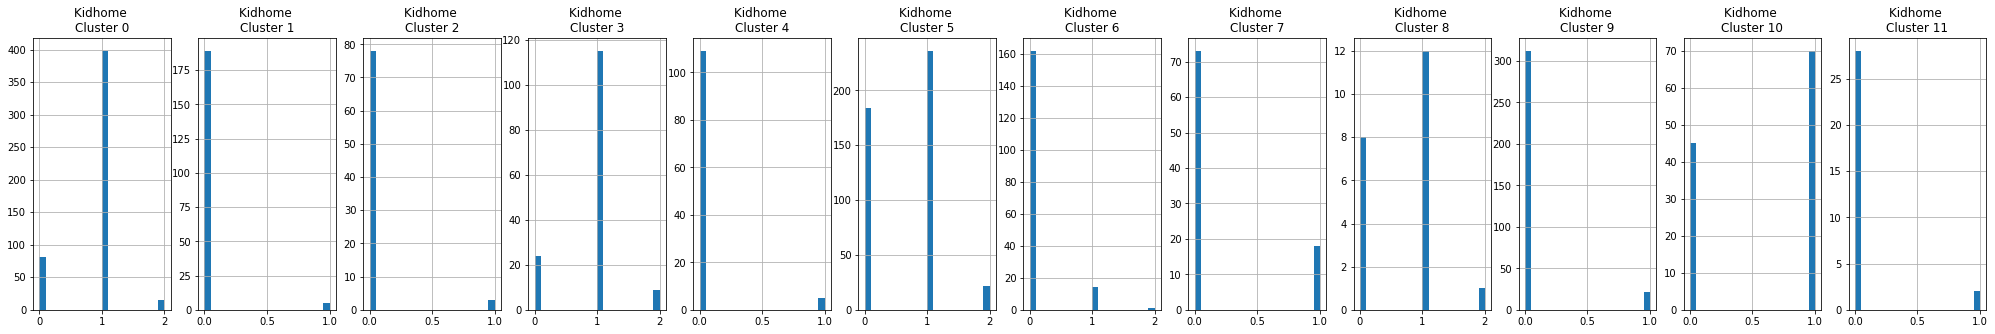

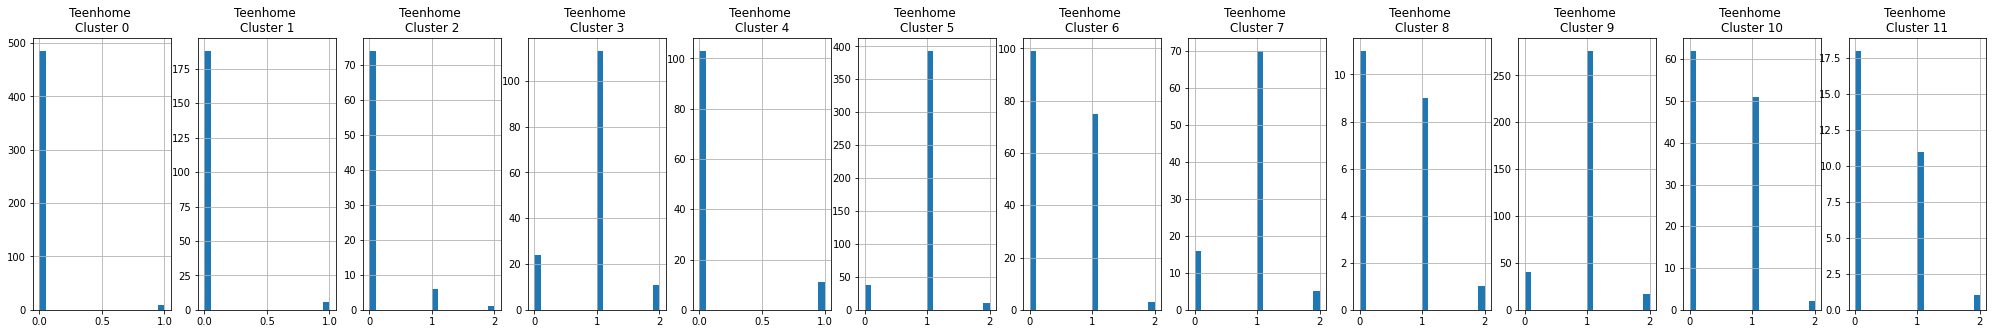

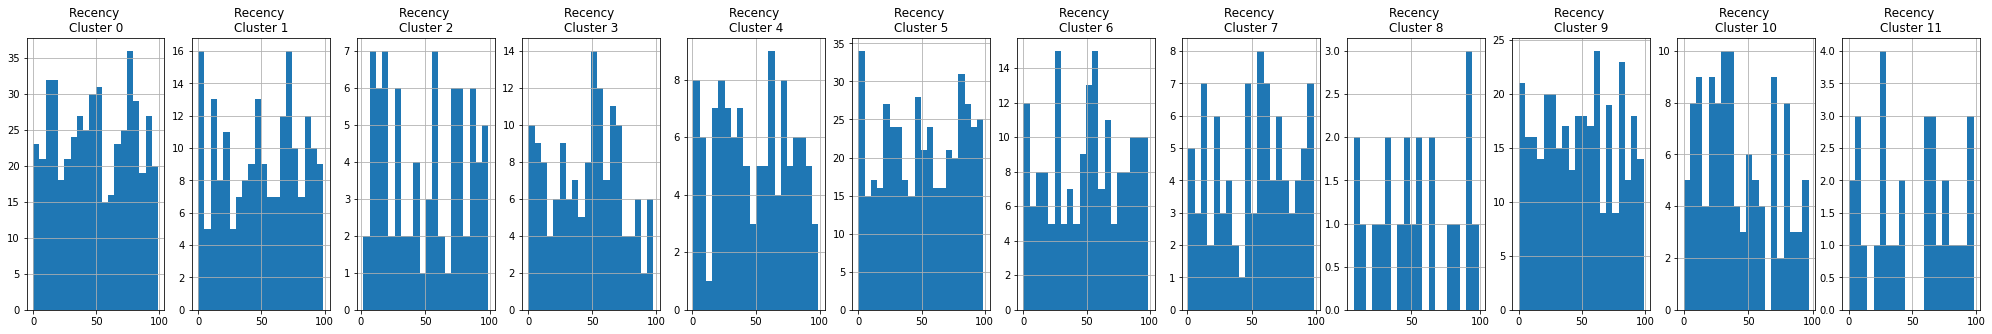

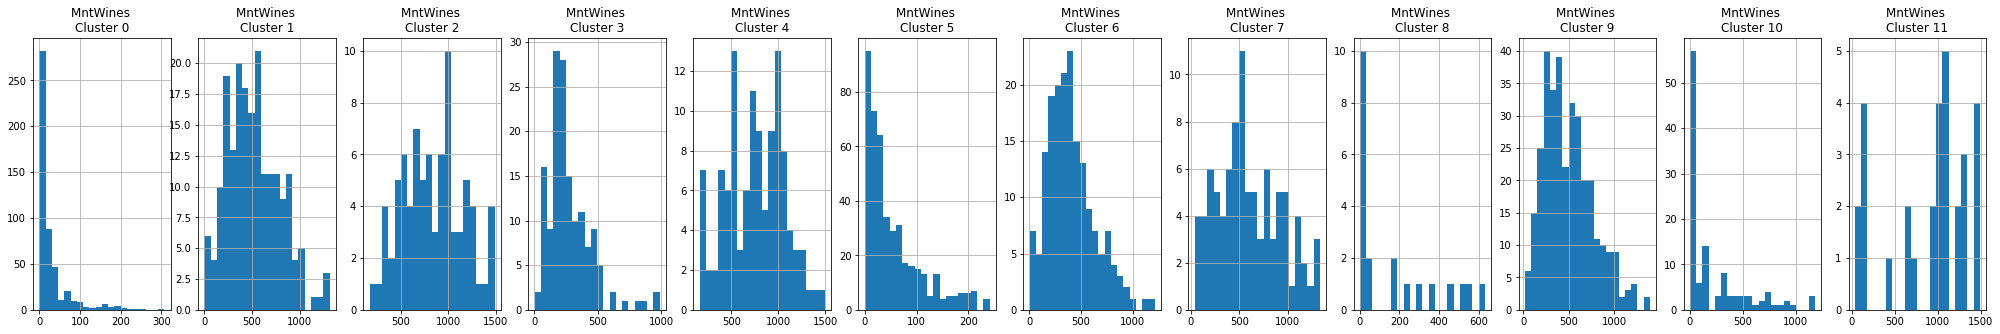

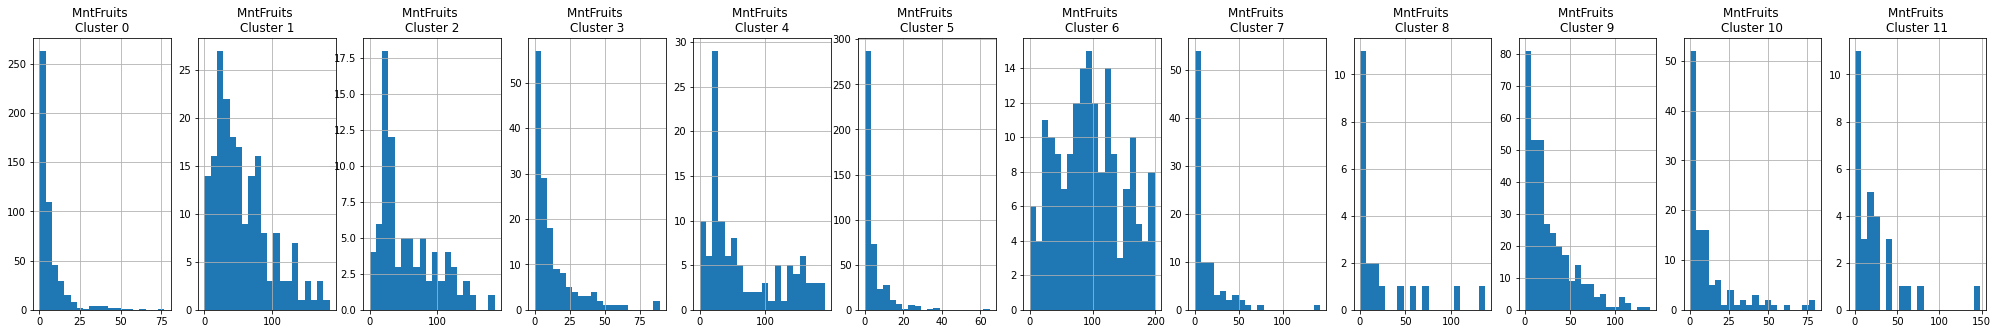

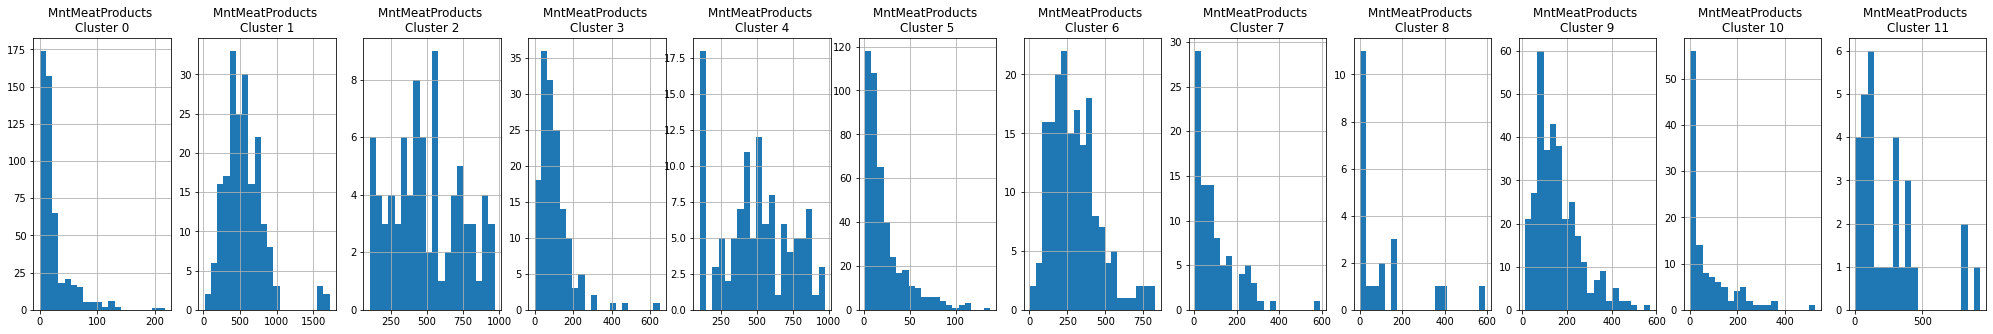

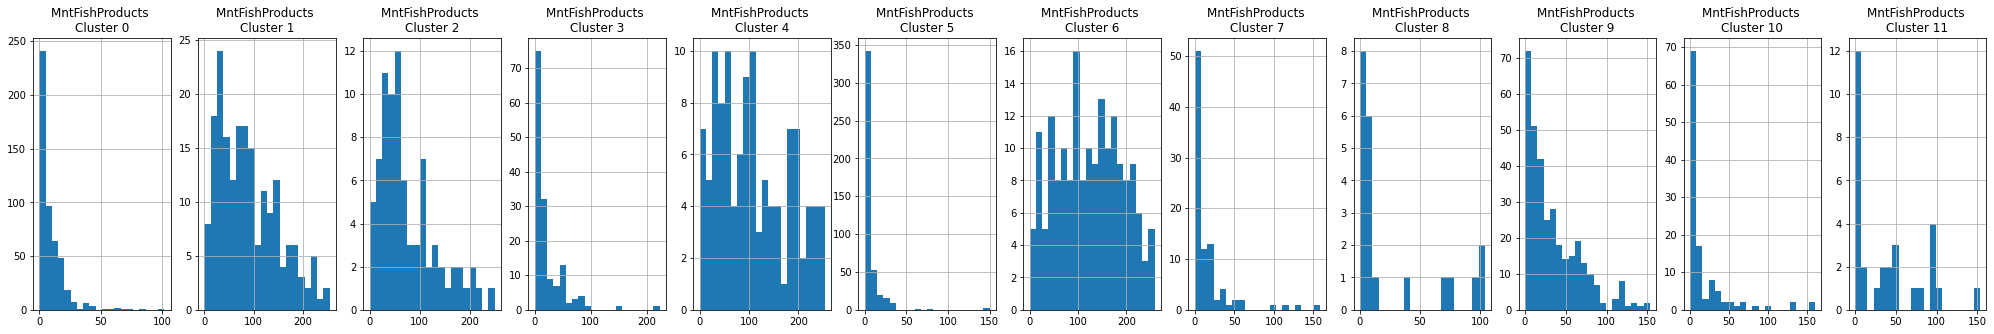

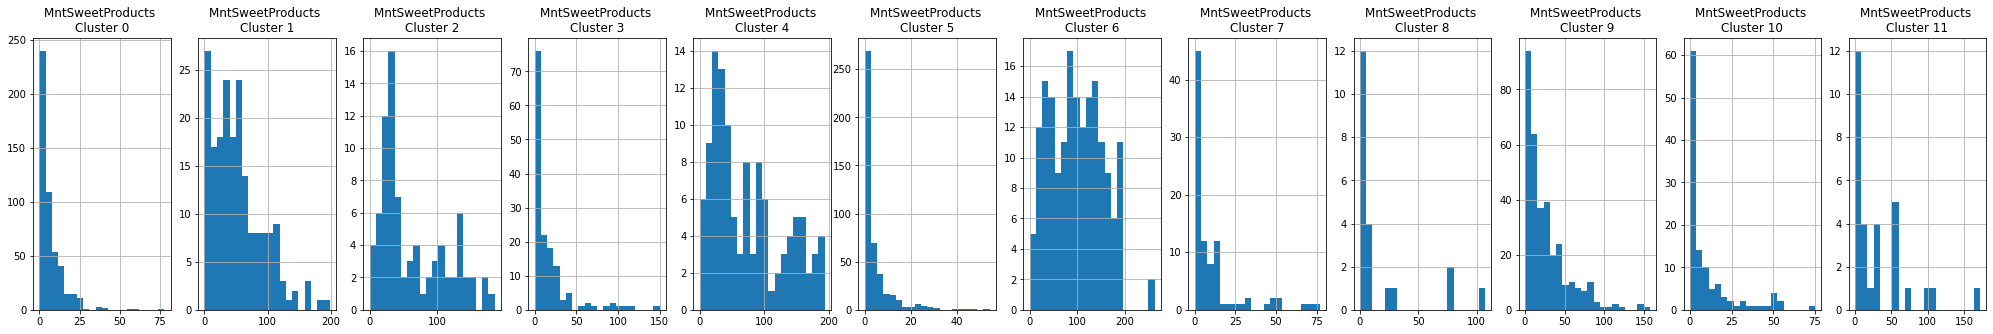

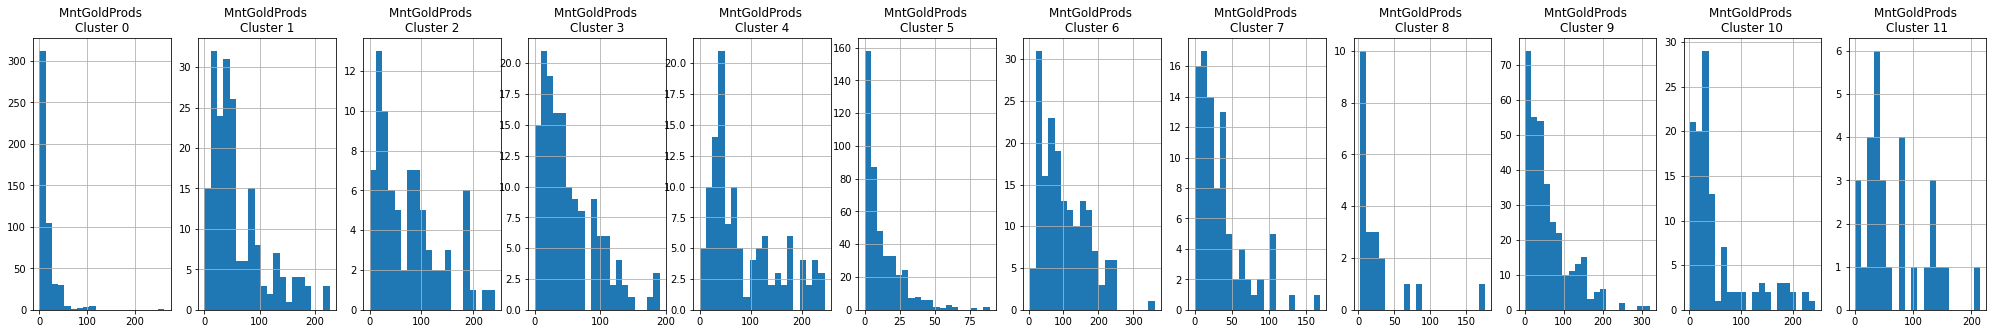

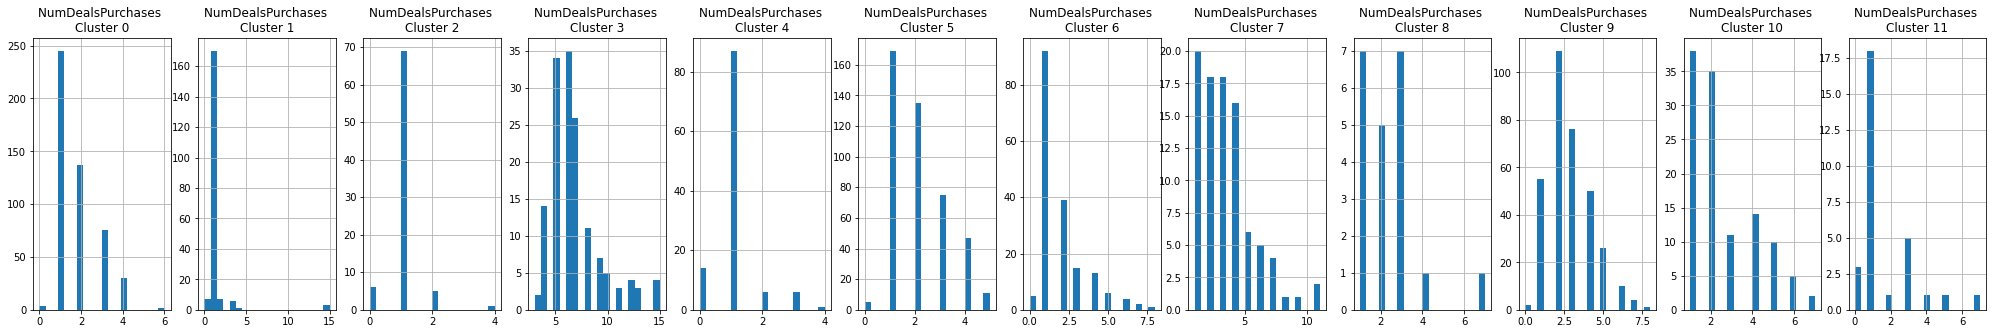

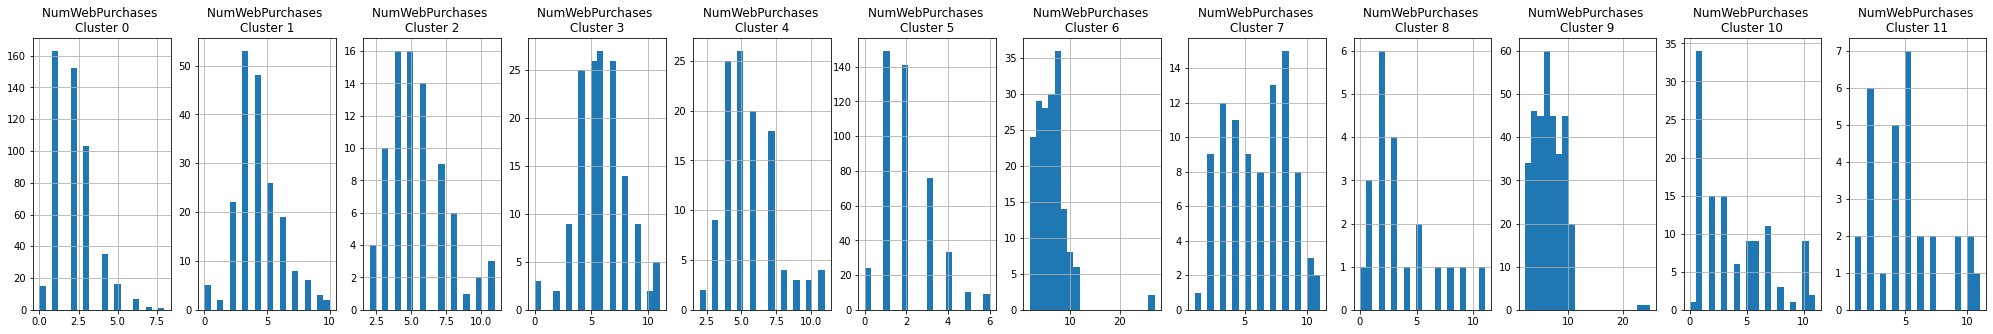

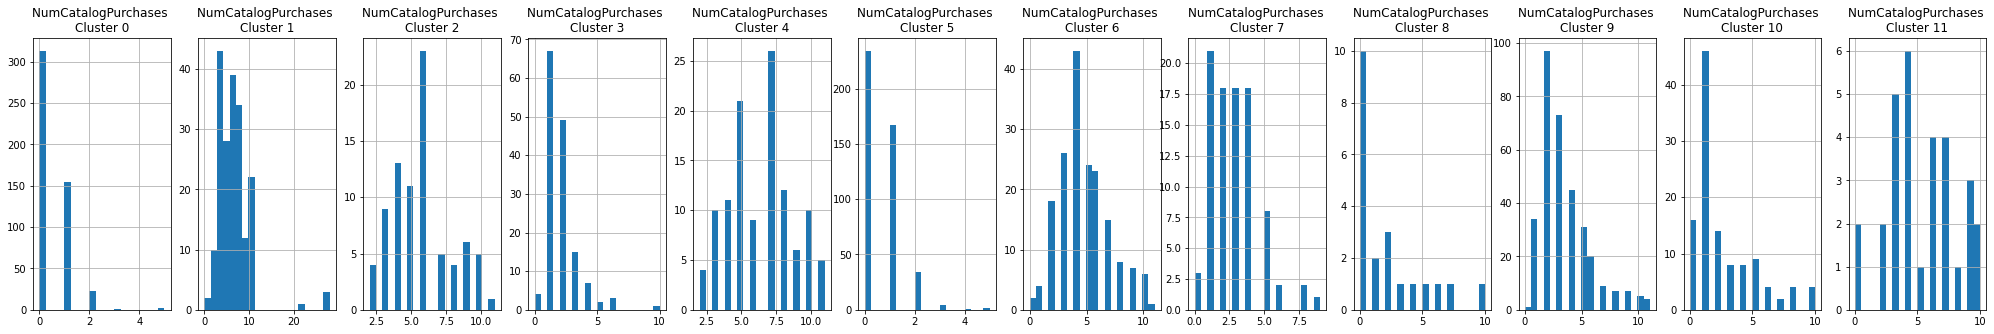

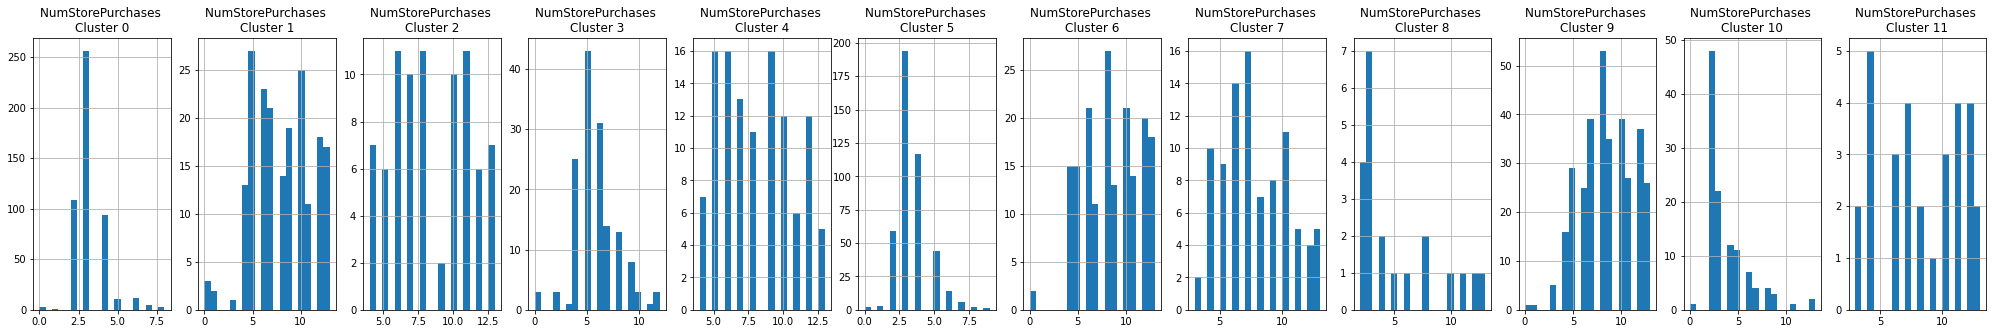

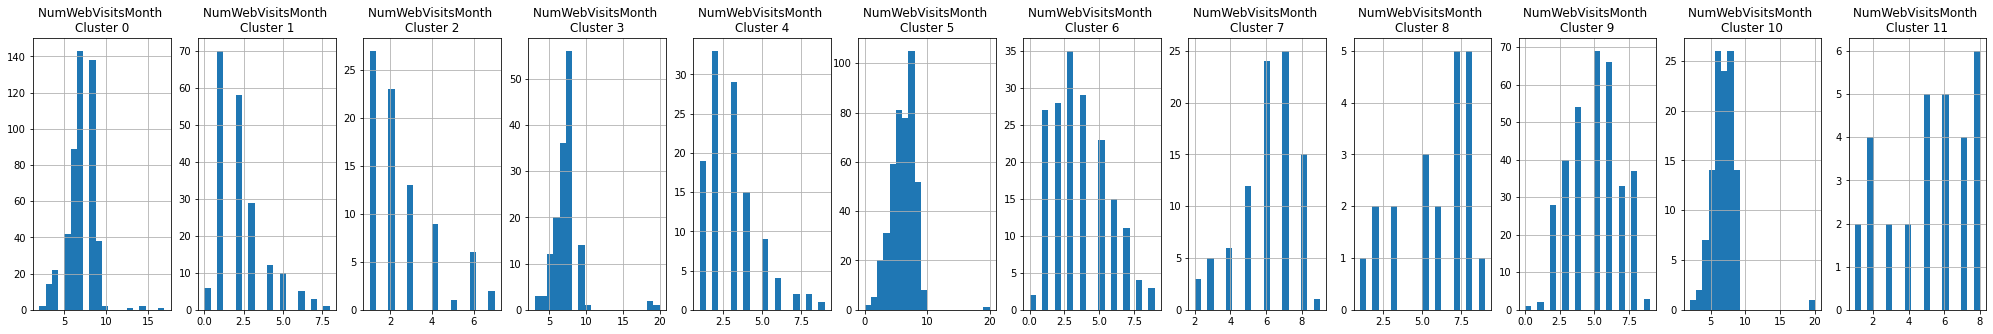

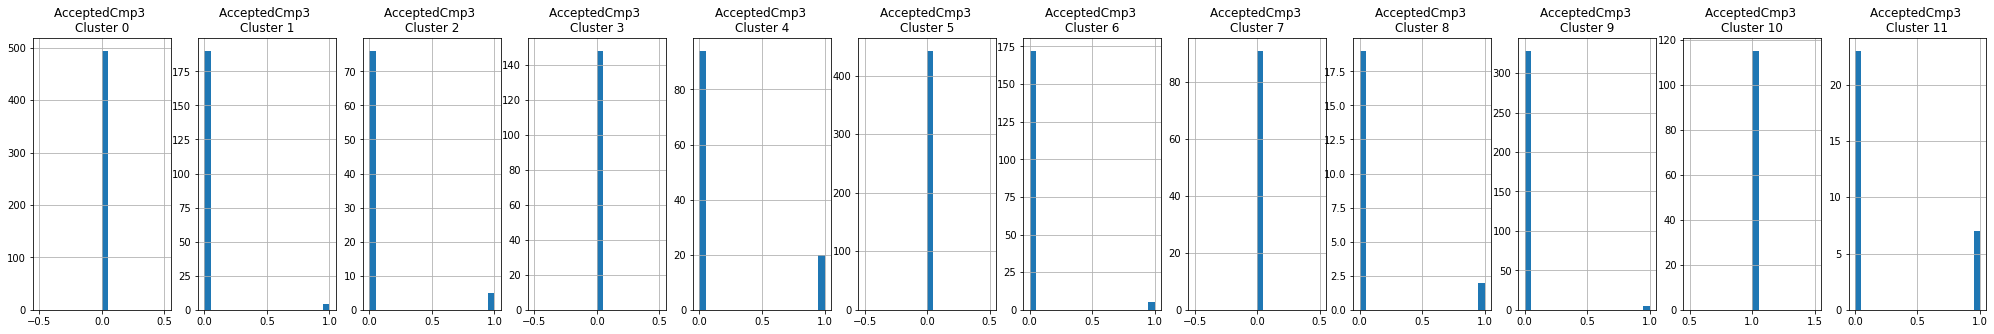

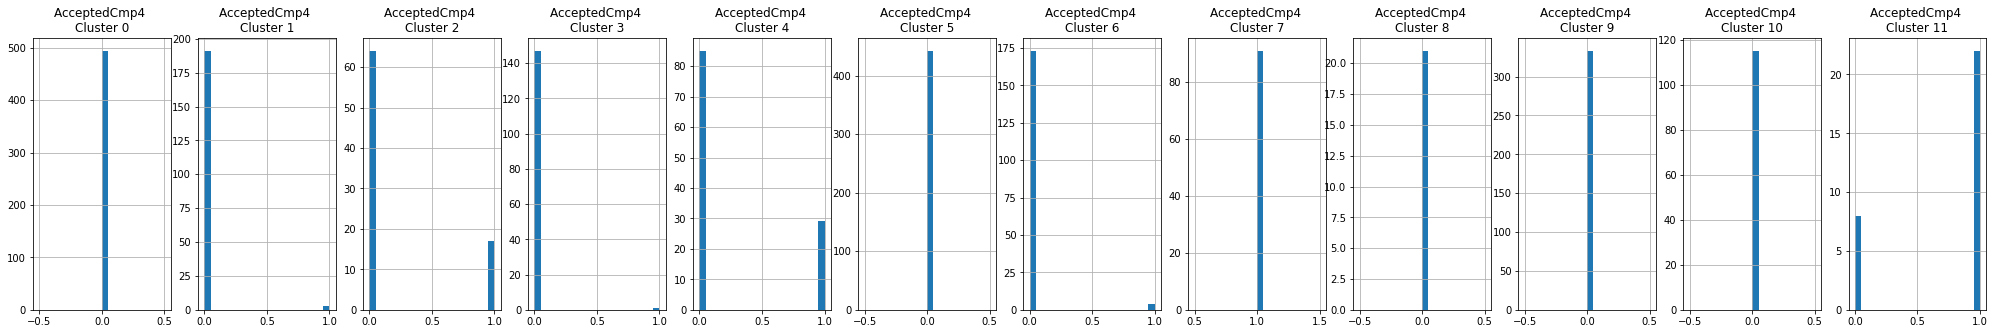

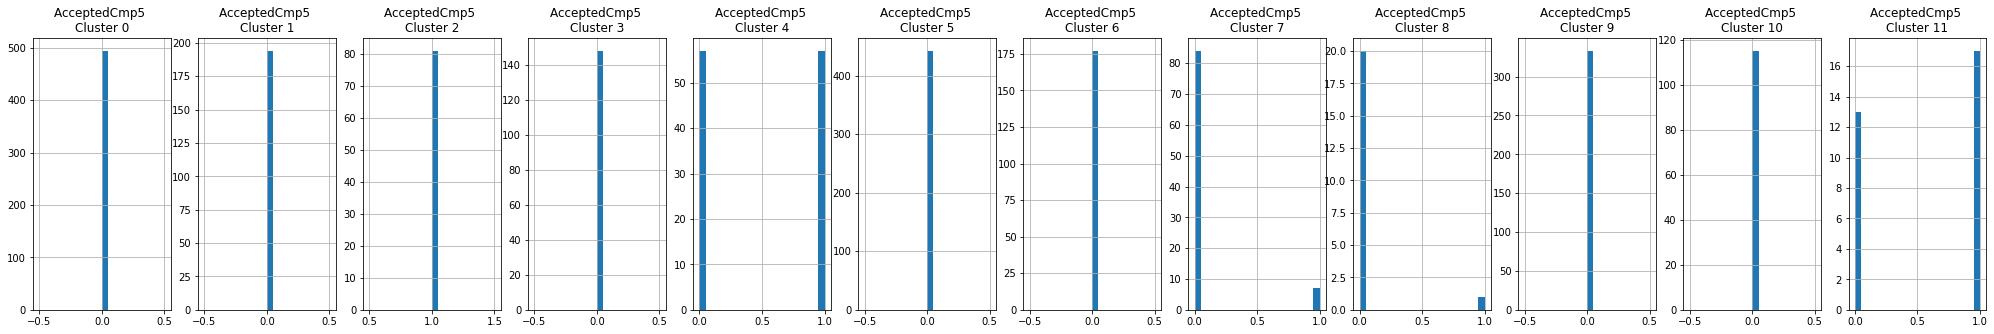

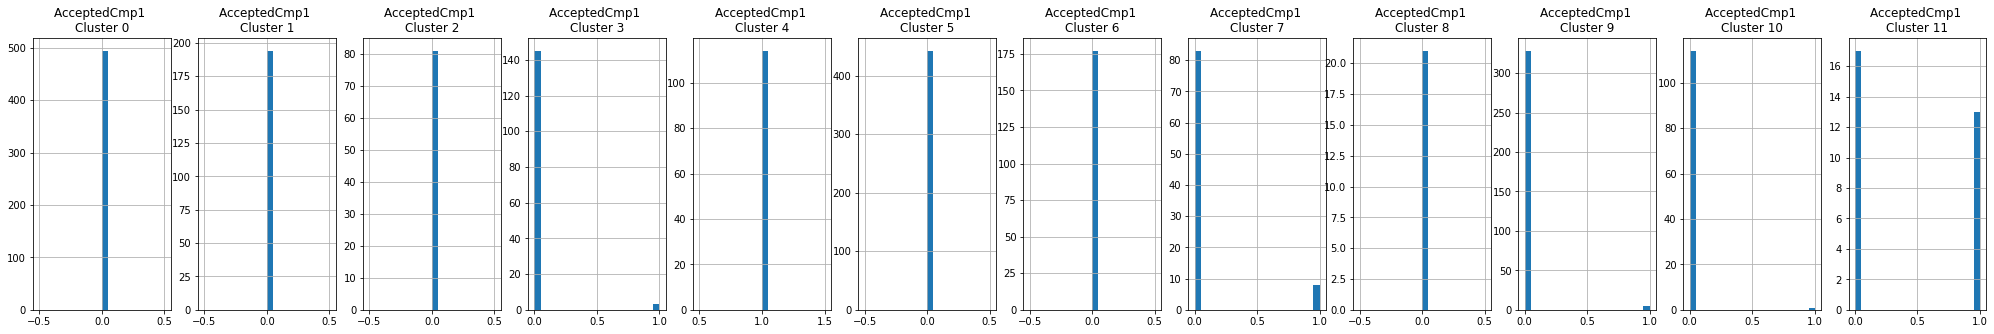

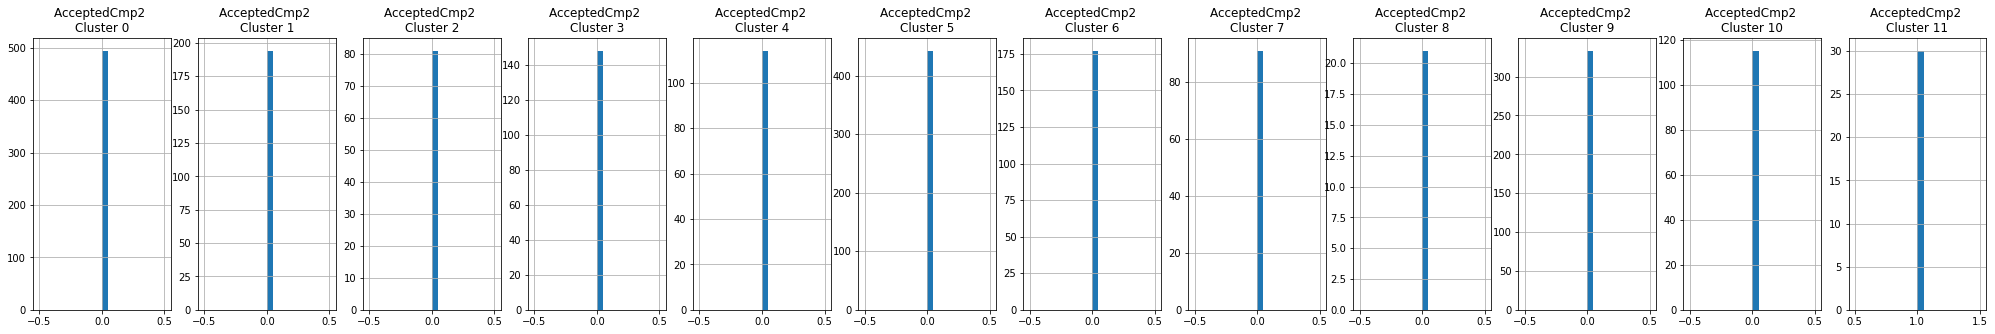

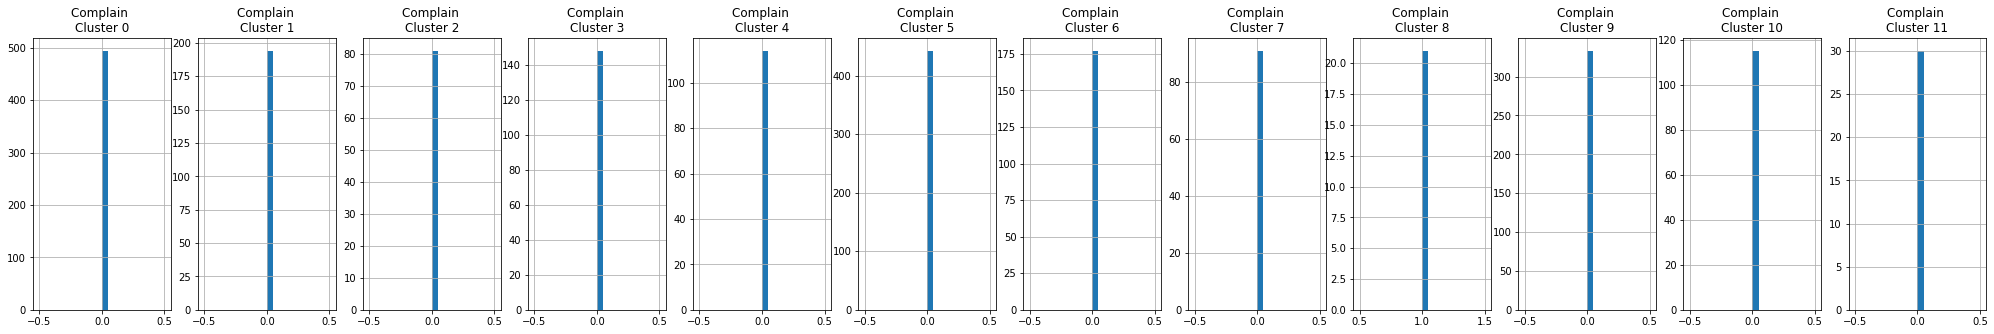

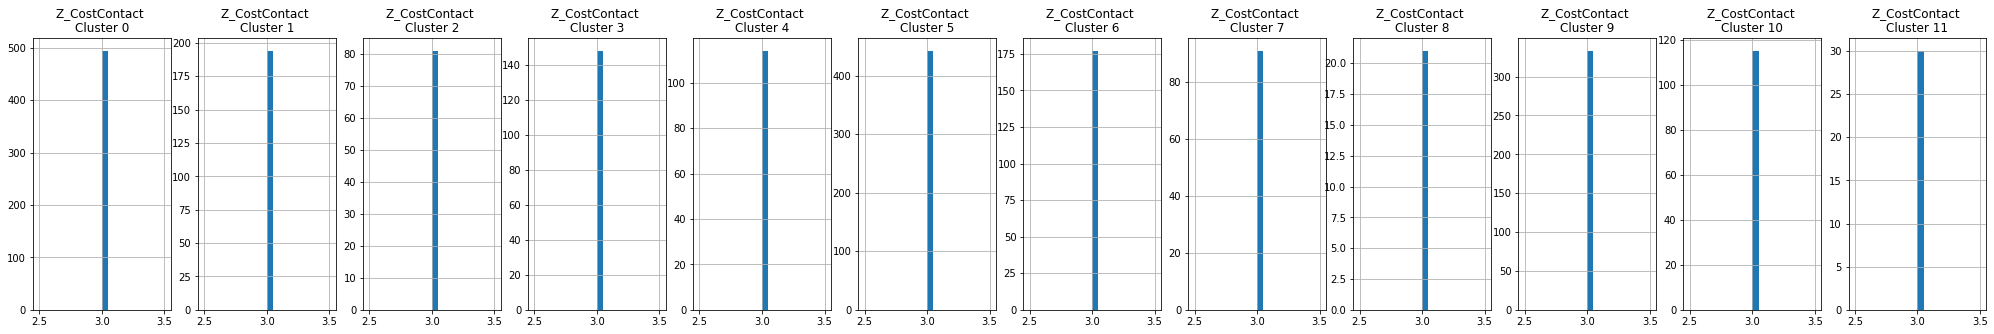

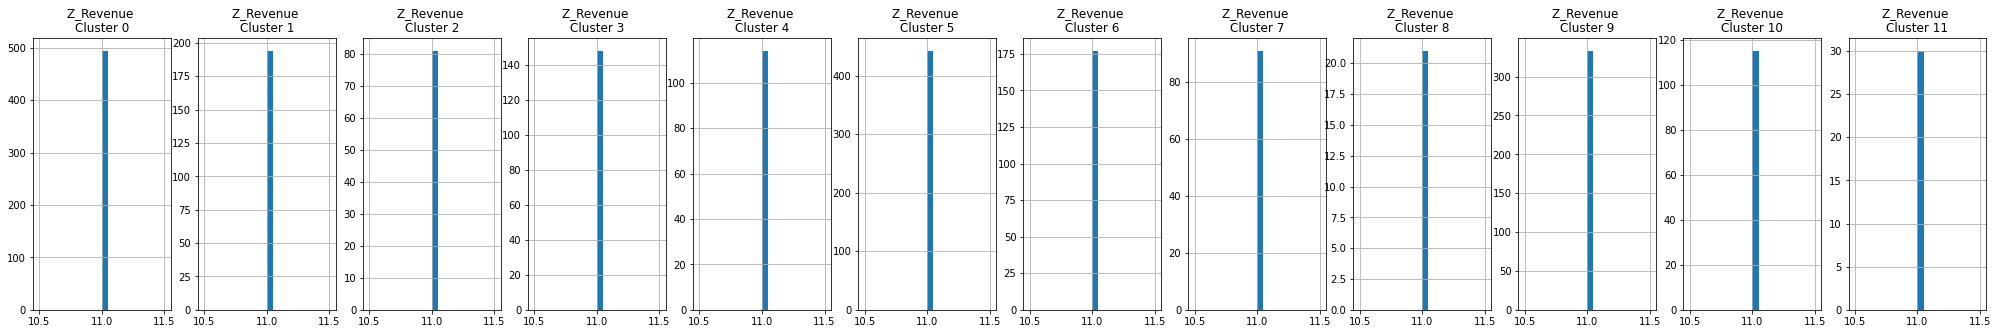

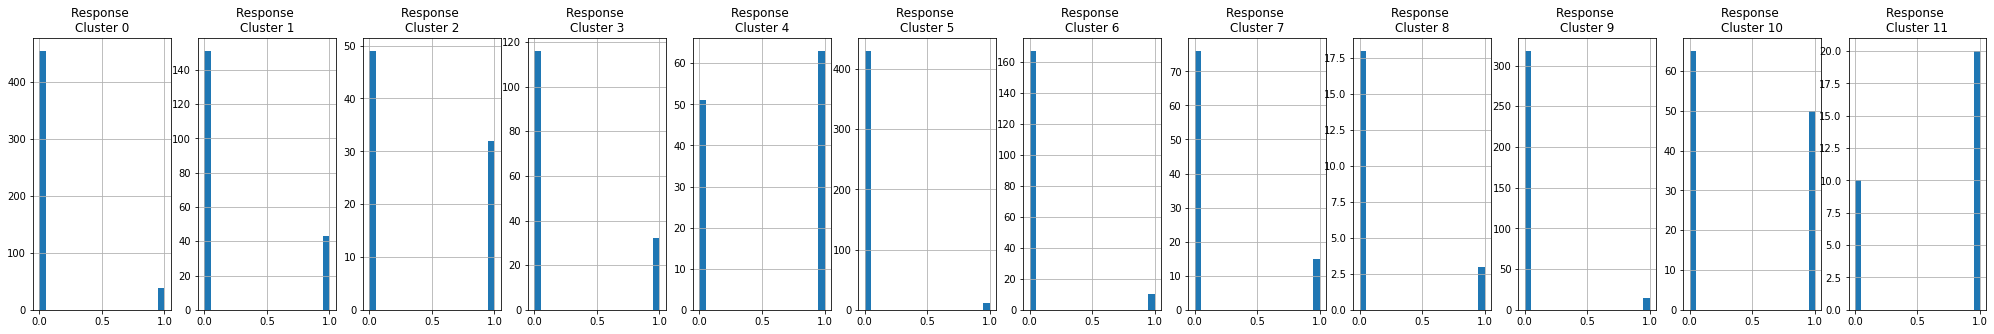

In [ ]:
#Gerando o histograma dos clusters/features para realizar a análise 
for i in dataset.columns:
  plt.figure(figsize=(35,5))
  for j in range(12):
    plt.subplot(1, 12, j + 1)
    cluster = dataset_df_cluster[dataset_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

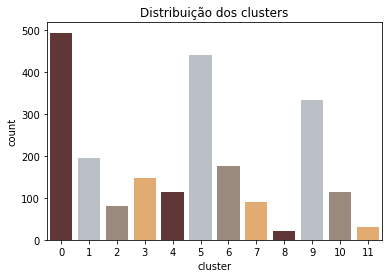

In [ ]:
#Plotando a quantidade de clientes por clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=dataset_df_cluster["cluster"], palette= pal)
pl.set_title("Distribuição dos clusters")
plt.show()

# **Preparando os dados para machine learning**

**8. Criando arquivo de treinamento e teste**

In [ ]:
#Criando o Dataset de treino/teste
X_prep = dataset

In [ ]:
#Dataset sem a escolha das features
y_train = X_prep["Response"]
X_train = X_prep.drop(["Response"], axis=1)

In [ ]:
#Treinando o modelo
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)

In [ ]:
# Dividindo a base de teste e treinamento
#70% da base de treinamento
#30% da base de teste
print('Base de treinamento(y_train)')
print("Total: %d" % y_train.shape)
print("Positivo: %d" % (y_train == 1).sum(axis=0))
print("Negativo: %d" % (y_train == 0).sum(axis=0))
print()
print('Base de teste(y_test)')
print("Total: %d" % y_test.shape)
print("Positivo: %d" % (y_test == 1).sum(axis=0))
print("Negativo: %d" % (y_test == 0).sum(axis=0))

Base de treinamento(y_train)
Total: 1680
Positivo: 255
Negativo: 1425

Base de teste(y_test)
Total: 560
Positivo: 79
Negativo: 481


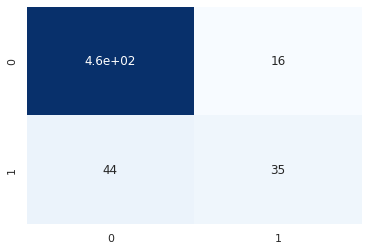

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       481
           1       0.69      0.44      0.54        79

    accuracy                           0.89       560
   macro avg       0.80      0.70      0.74       560
weighted avg       0.88      0.89      0.88       560



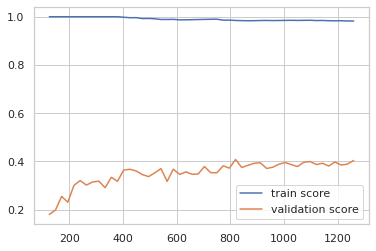

In [ ]:
# Analisando o modelo antes de selecionar a(s) feature(s) selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

def evaluation(model):
    y_pred = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, cmap='Blues', cbar=False)
    plt.show()
    print(classification_report(y_test,y_pred))

    N, train_score, val_score = learning_curve(model,X_train,y_train, scoring='f1', cv=4, train_sizes=np.linspace(0.1,1))
    plt.plot(N,train_score.mean(axis=1), label='train score')
    plt.plot(N,val_score.mean(axis=1), label='validation score')
    plt.legend()
    plt.show()
    
model = RandomForestClassifier()
model.fit(X_train,y_train)
evaluation(model)

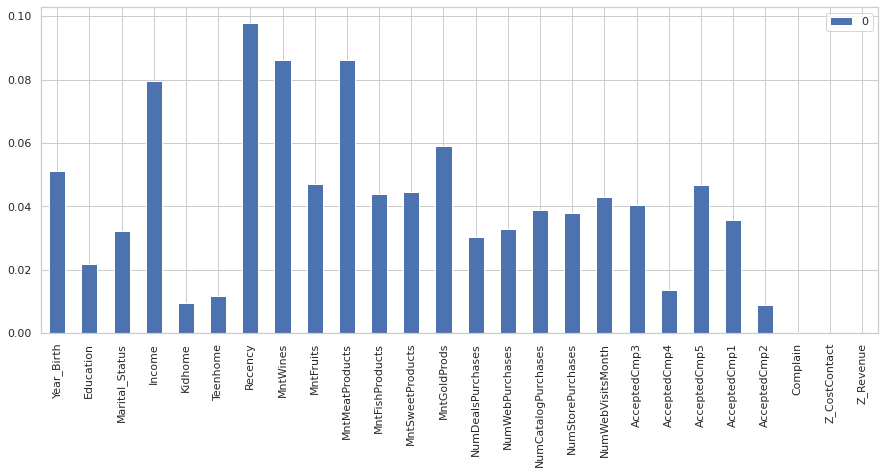

In [ ]:
#Selecionando as melhores features
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(15,6))
plt.show()

In [ ]:
#Features selecionadas
colu=[]
for col in (pd.DataFrame(model.feature_importances_, index=X_train.columns) > 0.05).transpose().columns:
    if (pd.DataFrame(model.feature_importances_, index=X_train.columns) > 0.05).transpose()[col][0]:
        colu.append(col)
colu.append("Response")
X_prep = X_prep[colu]
X_prep

,Year_Birth,Income,Recency,MntWines,MntMeatProducts,MntGoldProds,Response
0,1957,58138,58,635,546,88,1
1,1954,46344,38,11,6,6,0
2,1965,71613,26,426,127,42,0
3,1984,26646,26,11,20,5,0
4,1981,58293,94,173,118,15,0
...,...,...,...,...,...,...,...
2235,1967,61223,46,709,182,247,0
2236,1946,64014,56,406,30,8,0
2237,1981,56981,91,908,217,24,0
2238,1956,69245,8,428,214,61,0


**9. Treinando o modelo**

In [ ]:
#Treinando o modelo após a escolha das features
y_train = X_prep["Response"] #Target
X_train = X_prep.drop(["Response"], axis=1)
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)

In [ ]:
#Modelos que serão testados
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler #
from sklearn.model_selection import GridSearchCV

best_score = 0

**10. Modelo KMeans**

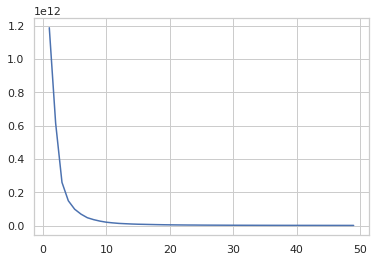

In [ ]:
#Modelo KMeans
inertia=[]
n_clusters_list=[]
for n_clusters in range(1,50):
    KM = KMeans(n_clusters=n_clusters)
    KM.fit(X_train,y_train)
    inertia.append(KM.inertia_)
    n_clusters_list.append(n_clusters)
plt.plot(n_clusters_list,inertia)
plt.show()

In [ ]:
from sklearn.metrics.cluster import completeness_score
KM = KMeans(n_clusters=9)
KM.fit(X_train,y_train)
print(f"Best f1 score : {completeness_score(KM.predict(X_test),y_test)} for hyperparameters : n_clusters = 9")
if best_score<grid.best_score:
    best_score = grid.best_score_
    model_name = "KMeans"

Best f1 score : 0.09286482046449851 for hyperparameters : n_clusters = 9


NameError: ignored

**11. Modelo K Neighbors**

Best f1 score : 0.3464982434719277 for hyperparameters : {'metric': 'euclidean', 'n_neighbors': 1}


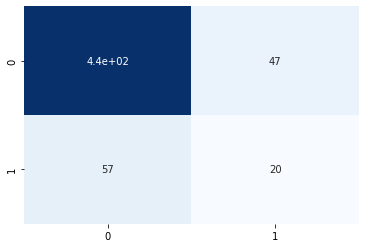

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       483
           1       0.30      0.26      0.28        77

    accuracy                           0.81       560
   macro avg       0.59      0.58      0.59       560
weighted avg       0.80      0.81      0.81       560



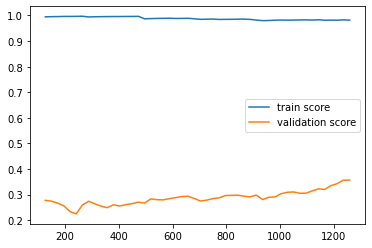

In [ ]:
#Modelo K Neighbors
hyperparameters = {'n_neighbors': np.arange(1,50), 'metric': ['euclidean','manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring="f1")
grid.fit(X_train,y_train)

n_neighbors,metric = grid.best_params_['n_neighbors'],grid.best_params_['metric']

print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "K Nearest Neighbors"

**12. Modelo RandomForestClassifier**

Best f1 score : 0.37869305925643953 for hyperparameters : {'max_depth': 20, 'max_features': 'log2', 'n_estimators': 2000}


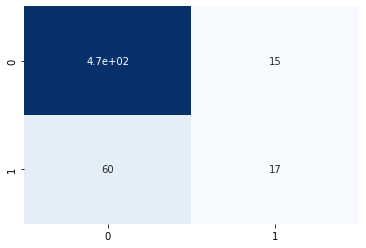

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       483
           1       0.53      0.22      0.31        77

    accuracy                           0.87       560
   macro avg       0.71      0.59      0.62       560
weighted avg       0.84      0.87      0.84       560



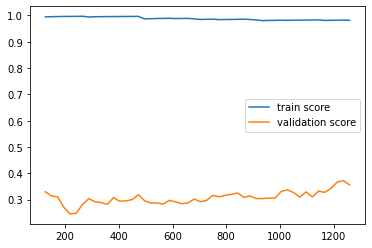

In [ ]:
#Modelo RandomForestClassifier
hyperparameters = {'n_estimators': [1500,2000,2500,3000,4000],'max_features':['auto','sqrt','log2'], 'max_depth':[10,20,30]}
grid = GridSearchCV(RandomForestClassifier(), hyperparameters, cv=5, scoring="f1")
grid.fit(X_train,y_train)
n_estimators,max_features,max_depth = grid.best_params_['n_estimators'],grid.best_params_['max_features'],grid.best_params_['max_depth']
print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "RandomForestClassifier"

**13. Modelo ExtraTreesClassifier**

Best score : 0.32861891285038863 for hyperparameters : {'max_depth': 20, 'max_features': 'auto', 'n_estimators': 500}


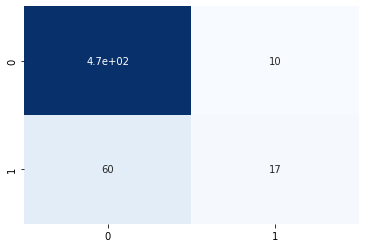

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       483
           1       0.63      0.22      0.33        77

    accuracy                           0.88       560
   macro avg       0.76      0.60      0.63       560
weighted avg       0.85      0.88      0.85       560



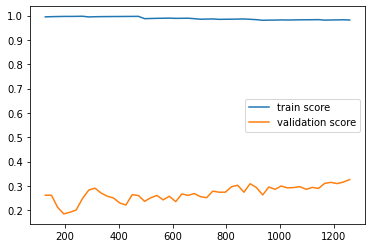

In [ ]:
#Modelo ExtraTreesClassifier
hyperparameters = {'n_estimators': [500,700,800,900,1000],'max_features':['auto','sqrt','log2'], 'max_depth':[10,20,30]}

grid = GridSearchCV(ExtraTreesClassifier(), hyperparameters, cv=5, scoring="f1")
grid.fit(X_train,y_train)
n_e,max_f,max_d= grid.best_params_['n_estimators'],grid.best_params_['max_features'],grid.best_params_['max_depth']
print(f"Best score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
#if best_score<grid.best_score_:
#    best_score = grid.best_score_
#    model_name = "ExtraTreesClassifier"

**14. Modelo AdaBoostClassifier**

Best f1 score : 0.37711158882157514 for hyperparameters : {'algorithm': 'SAMME.R', 'n_estimators': 1000}


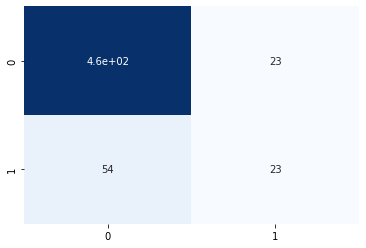

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       483
           1       0.50      0.30      0.37        77

    accuracy                           0.86       560
   macro avg       0.70      0.63      0.65       560
weighted avg       0.84      0.86      0.85       560



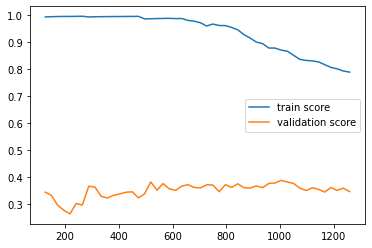

In [ ]:
#Modelo AdaBoostClassifier
hyperparameters = {'n_estimators': [500,700,800,900,1000],'algorithm':['SAMME', 'SAMME.R']}

grid = GridSearchCV(AdaBoostClassifier(), hyperparameters, cv=5, scoring="f1")
grid.fit(X_train,y_train)
n_est,algorithm= grid.best_params_['n_estimators'],grid.best_params_['algorithm']
print(f"Best f1 score : {grid.best_score_} for hyperparameters : {grid.best_params_}")
evaluation(grid.best_estimator_)
if best_score<grid.best_score_:
    best_score = grid.best_score_
    model_name = "AdaBoostClassifier"

# **10.Conclusão**

O melhor modelo utilizado para prever o target (Response – Cliente que aceitou a última oferta da campanha(1 Sim e 0 Não) ) foi o **RandomForestClassifier** com F1- Score  igual 0.378